In [29]:
import pandas as pd


In [30]:
#reading in CSV file
df= pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
#1. data dictionary-- see HW 2 file for proper formatting. XVAR: sqft_living. YVAR: price


In [32]:
#2. Calculating x and y means: 

#xmean:
x= df["sqft_living"]
xmean=x.mean()

#ymean:
y= df["price"]
ymean=y.mean()

ymean
#our explanatory var sqft_living will be useful for predicting price because house size should correlate to price

540088.1417665294

In [33]:
#3. 
df['xycov'] = (x- xmean) *(y - ymean)
df['xycov']

0        2.863374e+08
1       -1.023399e+06
2        4.716794e+08
3       -7.663015e+06
4        1.203224e+07
             ...     
21608    9.903042e+07
21609   -3.223432e+07
21610    1.462525e+08
21611    6.722826e+07
21612    2.279719e+08
Name: xycov, Length: 21613, dtype: float64

In [34]:
(x- xmean)

0        -899.899736
1         490.100264
2       -1309.899736
3        -119.899736
4        -399.899736
            ...     
21608    -549.899736
21609     230.100264
21610   -1059.899736
21611    -479.899736
21612   -1059.899736
Name: sqft_living, Length: 21613, dtype: float64

In [35]:
(y - ymean)

0       -318188.141767
1         -2088.141767
2       -360088.141767
3         63911.858233
4        -30088.141767
             ...      
21608   -180088.141767
21609   -140088.141767
21610   -137987.141767
21611   -140088.141767
21612   -215088.141767
Name: price, Length: 21613, dtype: float64

In [36]:
#4. 
beta = df['xycov'].sum() / x.sum()
alpha = ymean - (beta * xmean)
beta




113805.71607539318

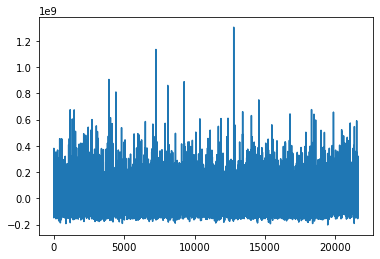

In [37]:
#5. regression
ypred = alpha + beta * x
ypred.plot()

In [38]:
ypred

0       -1.018736e+08
1        5.631630e+07
2       -1.485340e+08
3       -1.310519e+07
4       -4.497079e+07
             ...     
21608   -6.204165e+07
21609    2.672681e+07
21610   -1.200826e+08
21611   -5.407524e+07
21612   -1.200826e+08
Name: sqft_living, Length: 21613, dtype: float64

In [39]:
#6. Plotting
import matplotlib.pyplot as plt
import numpy as np

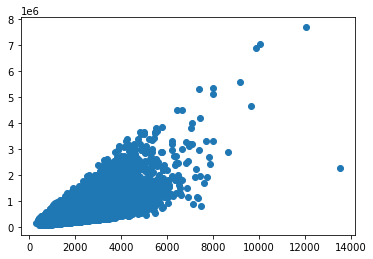

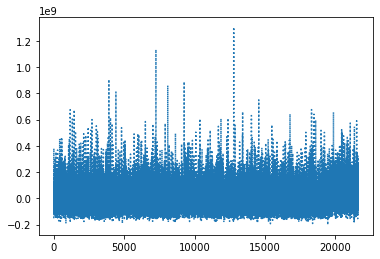

In [40]:


plt.scatter(x, y)

#plt.plot(x, alpha*x+beta) 

plt.show()



plt.plot(ypred, linestyle = 'dotted')


In [41]:
#SECTION BREAK

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [48]:
import seaborn as sns

In [43]:
#type(x)

In [44]:
#1 and 2. 
#OLS FUNCTION IN STATSMODELS NOT WORKING

model = smf.ols('y ~ x', data=df)
model = model.fit()
model.params

Intercept   -43580.743094
x              280.623568
dtype: float64

In [45]:
#3 equation 

# y = -43580.74 + 280.62 x

In [46]:
#4
y_pred = model.predict()


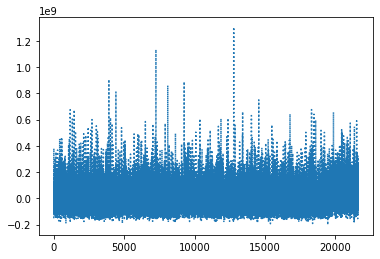

In [47]:
#5
#plotting ypred
plt.plot(ypred, linestyle = 'dotted')

In [ ]:
#plotting regression with seaborn

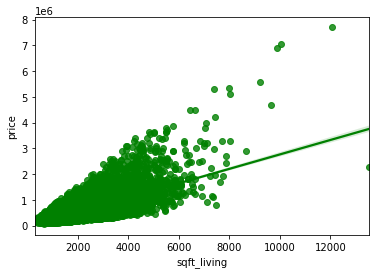

In [51]:
sns.regplot(data=df, x="sqft_living", y="price",color="g")